In [2]:
import requests
import visualisationGlock2 as v
import json
import matplotlib as plt
from IPython.display import clear_output
import time


urlo = "https://entersim.bloctave.fr/"
sim_id = "sim4"
url = f'https://entersim.bloctave.fr/control/poll/create_from_example/{sim_id}'
response = requests.post(url)
print(response)

<Response [422]>


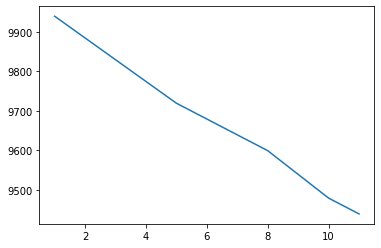

KeyboardInterrupt: 

In [89]:
t = 0
graph = v.LineGraph("Funds in euro", x_legend='Hours', y_legend="Funds in euro")
for i in range(100):

    requests.post( urlo+ "control/poll/run_one_step")

    url = urlo + "enterprise/poll/inventory"
    response = requests.get(url, stream=True)   
    t += 1
    x = response.json()["funds_in_eur"]
    graph.addPoint(t,x)

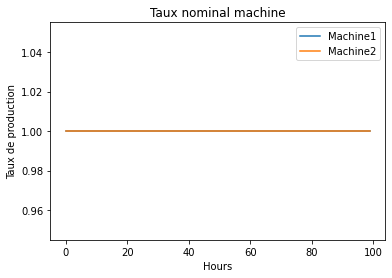

In [3]:
t = 0
graph = v.MultipleLineGraph(['Machine1', 'Machine2'], 'Taux nominal machine', x_legend = 'Hours', y_legend='Taux de production')

for i in range(100):
    requests.post( urlo+ "control/poll/run_one_step")
    response = requests.get(urlo + "enterprise/poll/machine")
    X=[]
    for json in response.json() :
        #print(json)
        X.append(json['machine_type']['nominal_output_rate_items_per_hour'])
    print(X)
    graph.addPoint(i,X)
    


